In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import time


(300, 1)
(300,)


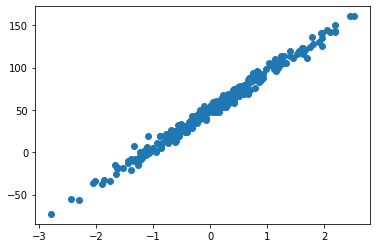

In [6]:
x, y = datasets.make_regression(n_samples=300, n_features=1, noise=5, random_state=1, bias=50)
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

plt.scatter(x, y)
plt.show()

In [8]:
# x ---> (x,1)

import numpy as np

# (n * "1")
bias_column = np.ones((x.shape[0], 1))

# (x,1)  : concatenate((a, b),axis = 0/1)
x_new = np.concatenate((x, bias_column), axis=1)
x_new[:5]

array([[ 0.21112476,  1.        ],
       [-1.09491185,  1.        ],
       [-0.69166075,  1.        ],
       [-1.23312074,  1.        ],
       [-0.02461696,  1.        ]])

In [10]:
# theta = ? = (A^T A)^-1 A^T y
theta = np.dot(np.dot(np.linalg.inv(np.dot(x_new.T, x_new)), x_new.T),y)
theta

array([44.22928803, 49.9617937 ])

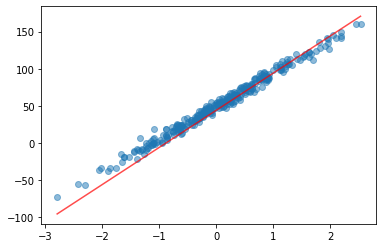

In [16]:
# y = wx +b
# b = 49.9617937
# w = 44.22928803

x_0 = np.min(x)
x_1 = np.max(x)
y_0 = theta[1]*x_0 +theta[0]
y_1 = theta[1]*x_1 +theta[0]

plt.scatter(x, y, alpha=0.5)
plt.plot([x_0, x_1], [y_0, y_1], c='r', alpha=0.7)
plt.show()

In [21]:
# 导入线性模型（表达函数集）
from sklearn import linear_model

# 导入衡量指标（损失函数）
from sklearn import metrics

# 选择模型
model = linear_model.LinearRegression()
# 训练模型
model.fit(x, y)  # 会自动加上 bias 项
# 预测(一般放入新的数据)
prediction_result = model.predict(x)

print(prediction_result[:5])
print(y[:5])

[59.2996913   1.53462231 19.37013109 -4.57825849 48.87300326]
[62.80194527 19.4821722  24.20153503  0.30939899 47.31715495]


In [23]:
# mse
mse = metrics.mean_squared_error(y, prediction_result)
print("mse:",mse)

# rmse
rmse = np.sqrt(mse)
print("rmse:",rmse)

# r2
r2 = metrics.r2_score(y, prediction_result)
print("r2:",r2)

mse: 22.1546536162187
rmse: 4.706873018918048
r2: 0.9874466693641443


In [24]:
# 获取模型中训练好的 w、b
print('w:',model.coef_)
print('b',model.intercept_)

w: [44.22928803]
b 49.961793696563234
